In [16]:
import numpy
import matplotlib.pyplot

In [17]:
# This project is extended and a library called PyGAD is released to build the genetic algorithm.
# PyGAD documentation: https://pygad.readthedocs.io
# Install PyGAD: pip install pygad
# PyGAD source code at GitHub: https://github.com/ahmedfgad/GeneticAlgorithmPython

def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = numpy.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

In [18]:
"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Puntos de entrada de la ecuacion
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Numero de pesos que se buscan optimizar
num_weights = len(equation_inputs)

"""
Genetic algorithm parametros:
    tamaño de apareamiento
    tamaño de la poblacion
"""
sol_per_pop = 8
num_parents_mating = 4

# Define el tamaño de la poblacion
# La población tendrá un cromosoma sol_per_pop donde cada cromosoma tiene genes num_weights
pop_size = (sol_per_pop, num_weights)

# Crea la poblacion inicial
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

[[ 0.16813388 -2.22461407 -2.92260101  1.80988492  1.65296966  1.02062383]
 [ 2.07558353  2.87443721  0.54983682  3.48135754 -3.5063531   0.21926665]
 [ 0.73315106 -3.80316763  3.14130509  1.3603823  -2.1870159  -0.90792334]
 [ 1.78404199  3.75893477  1.00625616  1.16192953 -0.97556578  2.6458578 ]
 [ 3.2834595  -3.72837334  2.80388539 -2.44433071  3.39067196  2.75457619]
 [-1.99571489 -3.8386431   3.32073863 -2.00596025 -1.98255201  0.05562819]
 [ 3.13098864 -3.09433951  1.89230843 -2.49492725 -0.85713344 -1.42574136]
 [-2.02369759 -3.21389749  2.71126275  1.43547622  1.45584679 -0.93850164]]


In [19]:
best_outputs = []
num_generations = 1000
for generation in range(num_generations):
    print("Generacion : ", generation)

    # Midel el ajuste de cada cromosoma en la poblacion
    fitness = cal_pop_fitness(equation_inputs, new_population)
    print("Ajuste")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))

    # Imprime el mejor resultado en la iteracion actual
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))

    # Selecting the best parents in the population for mating.
    # Selecciona los mejores ancestris en la poblacion apra el apareamiento
    parents = select_mating_pool(
        new_population,
        fitness,
        num_parents_mating)
    print("Ancestros")
    print(parents)

    # Genera la proxima cruza
    offspring_crossover = crossover(
        parents,
        offspring_size=(pop_size[0]-parents.shape[0], num_weights)
    )
    print("Cruza")
    print(offspring_crossover)

    # Añade algunas variaciones a la cruza, usando la mutacion
    offspring_mutation = mutation(offspring_crossover)
    print("Mutaciones")
    print(offspring_mutation)

    # Crea la nueva poblacion basada en la cruza de la familia, con sus mutaciones
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Obtener la mejor solución después de iterar terminando todas las generaciones.
# En un principio, se calcula la aptitud para cada solución en la generación final.
fitness = cal_pop_fitness(equation_inputs, new_population)

# Retorna el indice de la solucion correspondiente al mejor ajuste
best_match_idx = numpy.where(fitness == numpy.max(fitness))

Generacion :  0
Ajuste
[-19.03751354  59.42400711  56.6598334    7.24553458 -32.06136971
  22.83383013  28.99052908   3.39644839]
Best result :  59.424007105996004
Ancestros
[[ 2.07558353  2.87443721  0.54983682  3.48135754 -3.5063531   0.21926665]
 [ 0.73315106 -3.80316763  3.14130509  1.3603823  -2.1870159  -0.90792334]
 [ 3.13098864 -3.09433951  1.89230843 -2.49492725 -0.85713344 -1.42574136]
 [-1.99571489 -3.8386431   3.32073863 -2.00596025 -1.98255201  0.05562819]]
Cruza
[[ 2.07558353  2.87443721  0.54983682  1.3603823  -2.1870159  -0.90792334]
 [ 0.73315106 -3.80316763  3.14130509 -2.49492725 -0.85713344 -1.42574136]
 [ 3.13098864 -3.09433951  1.89230843 -2.00596025 -1.98255201  0.05562819]
 [-1.99571489 -3.8386431   3.32073863  3.48135754 -3.5063531   0.21926665]]
Mutaciones
[[ 2.07558353  2.87443721  0.54983682  1.3603823  -2.06990802 -0.90792334]
 [ 0.73315106 -3.80316763  3.14130509 -2.49492725 -0.46962895 -1.42574136]
 [ 3.13098864 -3.09433951  1.89230843 -2.00596025 -2.1800

Mejor solucion :  [[[ 3.13098864e+00 -3.09433951e+00  1.89230843e+00  3.48135754e+00
   -3.75652663e+02  2.19266647e-01]]]
Mejor solucion ajustada :  [4173.89123843]


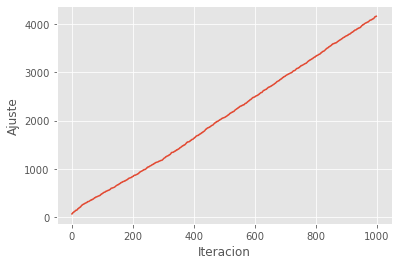

In [20]:
print("Mejor solucion : ", new_population[best_match_idx, :])
print("Mejor solucion ajustada : ", fitness[best_match_idx])

matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteracion")
matplotlib.pyplot.ylabel("Ajuste")
matplotlib.pyplot.show()